In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [5]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)

In [6]:
df = pd.get_dummies(df, columns = ["HomePlanet"])
df_test = pd.get_dummies(df_test, columns = ["HomePlanet"])

In [7]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [8]:
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df_test['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)

In [9]:
df['CryoSleep'] = df['CryoSleep'].replace({False: 0, True: 1})
df_test['CryoSleep'] = df_test['CryoSleep'].replace({False: 0, True: 1})
df['CryoSleep'] = df['CryoSleep'].astype(int)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)

In [10]:
df.isnull().sum()

PassengerId            0
CryoSleep              0
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [11]:
df.Cabin.nunique()

6560

In [12]:
df.Cabin.sample(5)

1002    F/220/P
3819    G/668/P
5742    G/988/P
1452    G/244/P
1676    G/278/S
Name: Cabin, dtype: object

In [13]:
for i, row in df.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df.at[i, 'Cabin_side'] = cabin_side
    else:
        df.at[i, 'Cabin_num'] = None
        df.at[i, 'Cabin_deck'] = None
        df.at[i, 'Cabin_side'] = None
        
        
for i, row in df_test.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df_test.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df_test.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df_test.at[i, 'Cabin_side'] = cabin_side
    else:
        df_test.at[i, 'Cabin_num'] = None
        df_test.at[i, 'Cabin_deck'] = None
        df_test.at[i, 'Cabin_side'] = None

In [14]:
df.drop(columns=["Cabin"], inplace=True)
df_test.drop(columns=["Cabin"], inplace=True)

In [15]:
import seaborn as sns

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cabin_num', ylabel='Density'>

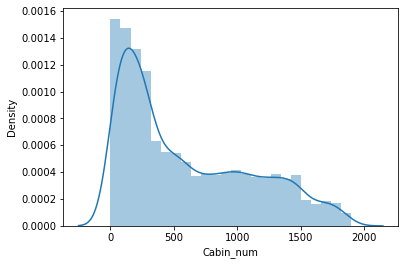

In [16]:
sns.distplot(df.Cabin_num)

In [17]:
df.Cabin_num.nunique()

1817

In [18]:
df.drop(columns='Cabin_num', inplace=True)
df_test.drop(columns='Cabin_num', inplace=True)

In [19]:
import numpy as np
# Sütundaki null değerleri say
null_count = df['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_deck'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [20]:
# Sütundaki null değerleri say
null_count = df_test['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_deck'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [21]:
df.Cabin_deck.value_counts()

F    2894
G    2658
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [22]:
mapping_cabin_d = {'A': 1, 'B': 2, 'C': 2,'D': 2, 'E': 3, 'F': 4,'G':5,'T':6}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['Cabin_deck'] = df['Cabin_deck'].replace(mapping_cabin_d)
df_test['Cabin_deck'] = df_test['Cabin_deck'].replace(mapping_cabin_d)

df_test['Cabin_deck'] = df_test['Cabin_deck'].astype(int)
df['Cabin_deck'] = df['Cabin_deck'].astype(int)

In [23]:
df.Cabin_side.value_counts()

S    4288
P    4206
Name: Cabin_side, dtype: int64

In [24]:
# Sütundaki null değerleri say
null_count = df['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_side'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [25]:
null_count = df_test['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_side'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [26]:
df.Cabin_side.value_counts()

S    4378
P    4315
Name: Cabin_side, dtype: int64

In [27]:
'''
S:1
P:0
'''

df['Cabin_side'] = df['Cabin_side'].replace({'S': 1, 'P': 0})
df_test['Cabin_side'] = df_test['Cabin_side'].replace({'S': 1, 'P': 0})
df['Cabin_side'] = df['Cabin_side'].astype(int)
df_test['Cabin_side'] = df_test['Cabin_side'].astype(int)

In [28]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [29]:
df_test.Destination.value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [30]:
df['Destination'].fillna(value='TRAPPIST-1e', limit=int(5915*182/8692), inplace=True)
df['Destination'].fillna(value='55 Cancri e', limit=int(1800*182/8692), inplace=True)
df['Destination'].fillna(value='PSO J318.5-22', limit=int(796*192/8692), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)

In [31]:
df_test['Destination'].fillna(value='TRAPPIST-1e', limit=int(2956*92/4277), inplace=True)
df_test['Destination'].fillna(value='55 Cancri e', limit=int(841*92/4277), inplace=True)
df_test['Destination'].fillna(value='PSO J318.5-22', limit=int(388*92/4277), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df_test['Destination'].fillna(df_test['Destination'].mode()[0], inplace=True)

In [32]:
df = pd.get_dummies(df, columns = ["Destination"])
df_test = pd.get_dummies(df_test, columns = ["Destination"])

In [33]:
df["Age"].fillna(df.Age.mean(), inplace=True)
df_test["Age"].fillna(df.Age.mean(), inplace=True)

In [34]:
from sklearn import preprocessing

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

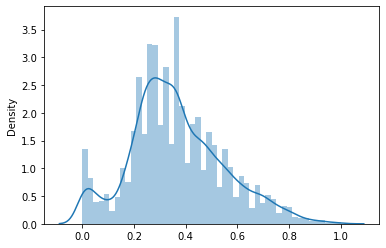

In [35]:
sns.distplot(preprocessing.minmax_scale(df.Age))

In [36]:
df["Age"]=preprocessing.minmax_scale(df.Age)
df_test["Age"]=preprocessing.minmax_scale(df_test.Age)

In [37]:
df_test.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [38]:
df['VIP'].fillna(value='False', limit=int(8291*203/8692), inplace=True)
df['VIP'].fillna(value='True', limit=int(199*203/8692), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)

In [39]:
df_test['VIP'].fillna(value='False', limit=int(4110*93/4277), inplace=True)
df_test['VIP'].fillna(value='True', limit=int(74*93/4277), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace=True)

In [40]:
df['VIP'] = df['VIP'].replace({'True': 1, 'False': 0})
df_test['VIP'] = df_test['VIP'].replace({'True': 1, 'False': 0})
df['VIP'] = df['VIP'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)

In [41]:
df["RoomService"].fillna(df.RoomService.mean(), inplace=True)
df_test["RoomService"].fillna(df.RoomService.mean(), inplace=True)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

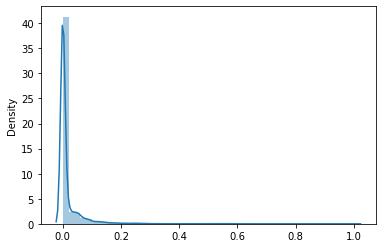

In [42]:
sns.distplot(preprocessing.minmax_scale(df.RoomService))

In [43]:
df["RoomService"]=preprocessing.minmax_scale(df.RoomService)
df_test["RoomService"]=preprocessing.minmax_scale(df_test.RoomService)

In [44]:
df["FoodCourt"].fillna(df.FoodCourt.mean(), inplace=True)
df_test["FoodCourt"].fillna(df.FoodCourt.mean(), inplace=True)

df["FoodCourt"]=preprocessing.minmax_scale(df.FoodCourt)
df_test["FoodCourt"]=preprocessing.minmax_scale(df_test.FoodCourt)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

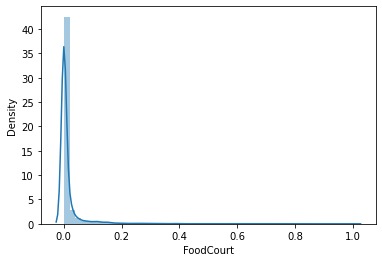

In [45]:
sns.distplot(df.FoodCourt)

In [46]:
df["ShoppingMall"].fillna(df.ShoppingMall.mean(), inplace=True)
df_test["ShoppingMall"].fillna(df.ShoppingMall.mean(), inplace=True)

df["ShoppingMall"]=preprocessing.minmax_scale(df.ShoppingMall)
df_test["ShoppingMall"]=preprocessing.minmax_scale(df_test.ShoppingMall)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

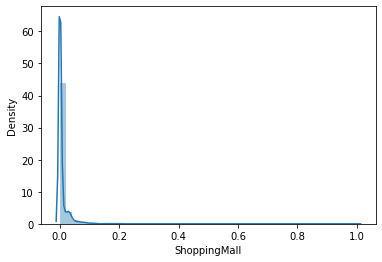

In [47]:
sns.distplot(df.ShoppingMall)

In [48]:
df["Spa"].fillna(df.Spa.mean(), inplace=True)
df_test["Spa"].fillna(df.Spa.mean(), inplace=True)

df["Spa"]=preprocessing.minmax_scale(df.Spa)
df_test["Spa"]=preprocessing.minmax_scale(df_test.Spa)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spa', ylabel='Density'>

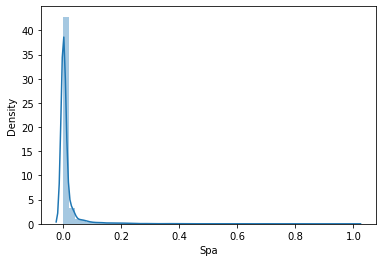

In [49]:
sns.distplot(df.Spa)

In [50]:
df["VRDeck"].fillna(df.VRDeck.mean(), inplace=True)
df_test["VRDeck"].fillna(df.VRDeck.mean(), inplace=True)

df["VRDeck"]=preprocessing.minmax_scale(df.VRDeck)
df_test["VRDeck"]=preprocessing.minmax_scale(df_test.VRDeck)

In [51]:
df['Transported'] = df['Transported'].replace({'True': 1, 'False': 0})

df['Transported'] = df['Transported'].astype(int)


In [52]:
from sklearn.preprocessing import Normalizer





normalizer = Normalizer()
df[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = normalizer.fit_transform(df[[
    'Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [53]:
df_test[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = normalizer.fit_transform(df_test[[
    'Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [54]:
from pycaret.classification import setup
clf = setup(df.drop(columns=['Name','PassengerId']), target='Transported', preprocess=False)
from pycaret.classification import compare_models
models = compare_models()

,Description,Value
0,Session id,2482
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 17)"
4,Transformed data shape,"(8693, 17)"
5,Transformed train set shape,"(6085, 17)"
6,Transformed test set shape,"(2608, 17)"
7,Numeric features,16


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8051,0.8829,0.8251,0.7961,0.8100,0.6101,0.6112,0.9880
lightgbm,Light Gradient Boosting Machine,0.7984,0.8774,0.8196,0.7888,0.8036,0.5966,0.5975,0.4720
gbc,Gradient Boosting Classifier,0.7941,0.8746,0.8193,0.7827,0.8003,0.5880,0.5891,0.4990
rf,Random Forest Classifier,0.7916,0.8726,0.7971,0.7914,0.7940,0.5832,0.5836,0.4810
xgboost,Extreme Gradient Boosting,0.7865,0.8684,0.8059,0.7787,0.7918,0.5729,0.5737,0.4730
ada,Ada Boost Classifier,0.7839,0.8647,0.7990,0.7788,0.7884,0.5677,0.5685,0.4300
et,Extra Trees Classifier,0.7836,0.8619,0.7938,0.7808,0.7869,0.5671,0.5677,0.4740
lda,Linear Discriminant Analysis,0.7747,0.8611,0.7289,0.8060,0.7651,0.5497,0.5528,0.3960
ridge,Ridge Classifier,0.7745,0.0000,0.7276,0.8067,0.7646,0.5494,0.5526,0.3790
lr,Logistic Regression,0.7744,0.8628,0.7387,0.7990,0.7672,0.5490,0.5511,0.9830


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [55]:
from pycaret.classification import *
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7915,0.8620,0.8111,0.7830,0.7968,0.5828,0.5832
1,0.7931,0.8787,0.8111,0.7855,0.7981,0.5861,0.5864
2,0.8144,0.8923,0.7818,0.8392,0.8094,0.6291,0.6306
3,0.8013,0.8868,0.8274,0.7888,0.8076,0.6024,0.6032
4,0.7849,0.8578,0.8176,0.7699,0.7930,0.5695,0.5707
5,0.7977,0.8827,0.7908,0.8040,0.7974,0.5954,0.5955
6,0.8339,0.9054,0.8758,0.8097,0.8414,0.6676,0.6698
7,0.8141,0.8957,0.8627,0.7881,0.8237,0.6280,0.6309
8,0.7961,0.8740,0.8333,0.7774,0.8044,0.5919,0.5935


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
from pycaret.classification import predict_model
predicts=predict_model(catboost, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6776
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9695
2,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9976
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9754
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.8772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6776
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,5,0,0,0,1,0,0.6471
4274,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.9560
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.8608


In [57]:
predicts["PassengerId"]=df_test["PassengerId"]
submission=predicts[["PassengerId","Transported"]]
submission['Transported'] = submission['Transported'].replace({1: 'True', 0: 'False'})
df['Transported'] = df['Transported'].astype(str)

In [58]:
submission.to_csv('submission_pycaretcat_norm.csv', index=False)

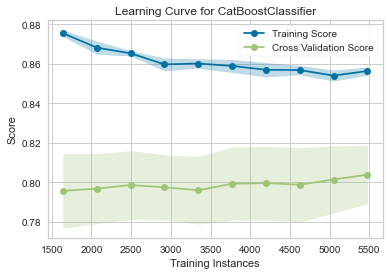

In [59]:
plot_model(catboost, plot='learning')

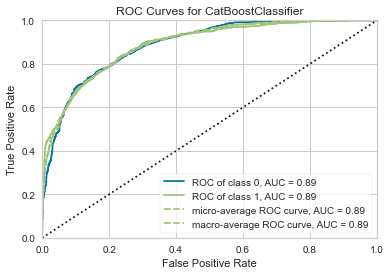

In [60]:
plot_model(catboost, plot='auc')

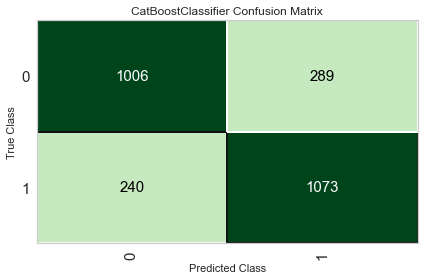

In [61]:
plot_model(catboost, plot='confusion_matrix')

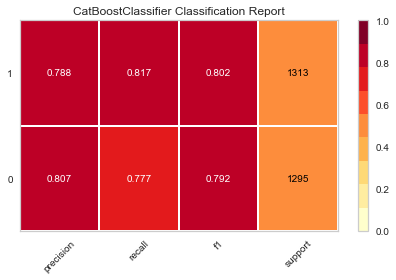

In [62]:
plot_model(catboost, plot='class_report')

In [63]:
catboost_regular_norm = create_model('catboost', 
                        fold = 10,
                        verbose = False,
                        l2_leaf_reg = 3)

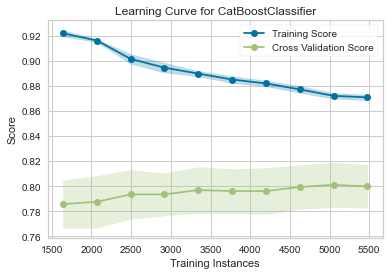

In [64]:
plot_model(catboost_regular_norm, plot='learning')

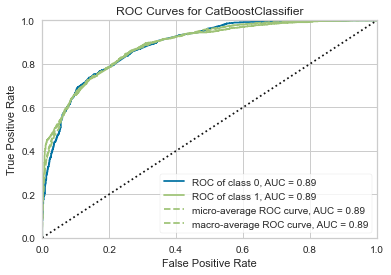

In [65]:
plot_model(catboost_regular_norm, plot='auc')

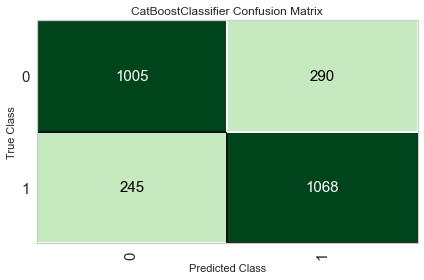

In [66]:
plot_model(catboost_regular_norm, plot='confusion_matrix')

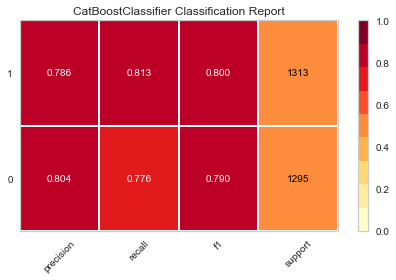

In [67]:
plot_model(catboost_regular_norm, plot='class_report')

In [68]:
predicts=predict_model(catboost_regular_norm, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6763
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9794
2,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9982
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9797
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.8873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6763
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,5,0,0,0,1,0,0.6678
4274,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.9632
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.8467


In [69]:
predicts["PassengerId"]=df_test["PassengerId"]
submission=predicts[["PassengerId","Transported"]]
submission['Transported'] = submission['Transported'].replace({1: 'True', 0: 'False'})
df['Transported'] = df['Transported'].astype(str)

In [70]:
submission.to_csv('submission_pycaretcat_regularnorm3.csv', index=False)

In [72]:
catboost_regular_tuned = tune_model(catboost_regular_norm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7865,0.8497,0.7980,0.7827,0.7903,0.5730,0.5731
1,0.7816,0.8687,0.8046,0.7719,0.7879,0.5630,0.5636
2,0.8194,0.8922,0.7850,0.8456,0.8142,0.6389,0.6406
3,0.7849,0.8771,0.7948,0.7821,0.7884,0.5697,0.5698
4,0.7734,0.8505,0.8013,0.7616,0.7810,0.5466,0.5473
5,0.8076,0.8803,0.8105,0.8078,0.8091,0.6151,0.6151
6,0.8174,0.8941,0.8529,0.7982,0.8246,0.6347,0.6362
7,0.8076,0.8961,0.8529,0.7838,0.8169,0.6149,0.6173
8,0.7878,0.8684,0.8105,0.7774,0.7936,0.5755,0.5760


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


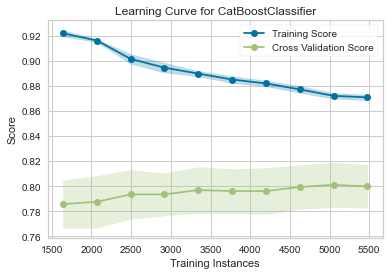

In [73]:
plot_model(catboost_regular_tuned, plot='learning')

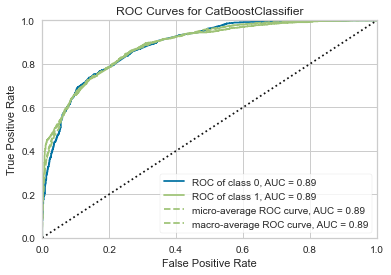

In [74]:
plot_model(catboost_regular_tuned, plot='auc')

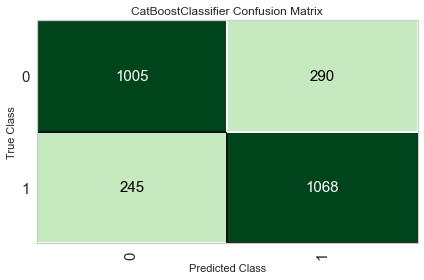

In [75]:
plot_model(catboost_regular_tuned, plot='confusion_matrix')

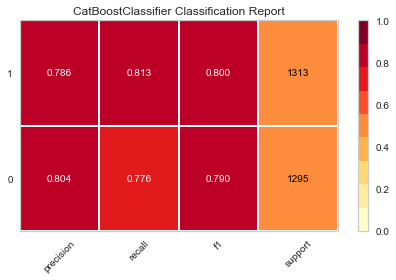

In [76]:
plot_model(catboost_regular_tuned, plot='class_report')

In [78]:
predicts=predict_model(catboost_regular_tuned, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6763
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9794
2,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9982
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9797
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.8873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6763
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,5,0,0,0,1,0,0.6678
4274,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.9632
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.8467


In [79]:
submission.to_csv('submission_pycaretcat_tuned_regular_norm3.csv', index=False)